# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [3]:
from sklearn import tree

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [4]:
# X è matrice che rappresenta i dati in input (ogni riga è un esempio con 3 caratteristiche)
# Y è un array che rappresenta i valori target corrisponenti(etichette per ciascuno esempio)
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [5]:
#Dichiarazione del modello e addestramento
clf = tree.DecisionTreeClassifier() #Crea un modello di albero decisionale
clf = clf.fit(X, Y) # Addestra il modello sui dati X e le etichette Y

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [6]:
print(clf.predict([[0, 1, 1]])) #Predizione singolo esempio

[0]


In [7]:
print(clf.predict([[1, 0, 1],[0, 0, 1]])) #Predizione doppio esempio

[1 0]


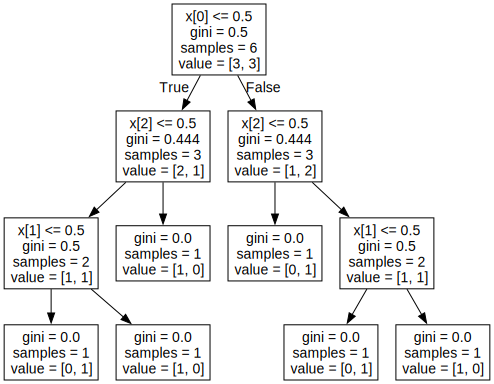

In [8]:
import graphviz #per esportare e visualizzare l'albero decisionale
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [33]:
from sklearn.datasets import load_iris
from collections import Counter
iris = load_iris()

print(iris.feature_names) #nomi delle caratteristiche
print(iris.target_names) #nomi delle etichette
print(iris.data[0]) #primo esempio
print(iris.target[0]) #etichetta del primo esempio
print(iris.data[0], iris.target[0]) #primo esempio con etichetta
print(iris.target_names)

# Controllo della distribuzione delle classi
class_distribution = Counter(iris.target)
print("Distribuzione delle classi:", class_distribution)

for label, count in class_distribution.items():
    print(f"Classe {iris.target_names[label]}: {count} esempi")




['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0
[5.1 3.5 1.4 0.2] 0
['setosa' 'versicolor' 'virginica']
Distribuzione delle classi: Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})
Classe setosa: 50 esempi
Classe versicolor: 50 esempi
Classe virginica: 50 esempi


# Declare the type of prediction model and the working criteria for the model induction algorithm

In [10]:
#criterion="entropy" --> usa l'entropia per suddividere i nodi
#min_samples_leaf=5 --> ogni foglia deve contenere almeno 5 campioni
#class_weight={0:1, 1:1, 2:1} --> assegna uguale peso a tutte le classi
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [11]:
# Generate a random permutation of the indices of examples that will be later used
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
#print(indices)

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

#Crea i set di training (iris_X_train, iris_y_train) e test (iris_X_test, iris_y_test) utilizzando gli indici calcolati.
iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10
#print(iris_X_train)
#print(iris.data)
iris_y_train = iris.target[indices_training]

iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [12]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [13]:
# apply fitted model "clf" to the test set
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test)
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [14]:
# print the corresponding instances indexes and class names
#Confronto delle predizioni
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [15]:
#Stampa i valori delle caratteristiche per ciascun esempio testato.
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [16]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [18]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree

## 1. Print the picture in a PDF file

In [19]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [20]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


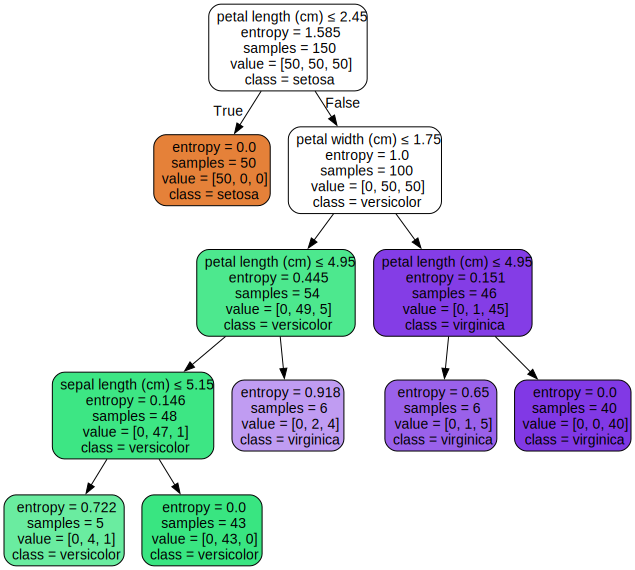

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Il tuo lavoro: cosa devi fare

Modifica il notebook Jupyter fornito sugli alberi decisionali sui dati Iris ed esegui le seguenti attività:

1. ottieni un'inflazione artificiale di alcune classi nel training set di un fattore dato: 10 (pesano di più le classi virginica e versicolor che sono più difficili da discriminare). Impara l'albero in queste condizioni. 1.b) modifica il peso di alcune classi (imposta a 10 i pesi per la classificazione errata tra virginica e versicolor e viceversa) e impara l'albero in queste condizioni. Dovresti ottenere risultati simili al passaggio 1.
2. impara gli alberi ma cerca di evitare l'overfitting (migliorando l'errore sul test set) regolando gli iperparametri su: il numero minimo di campioni per foglia, la profondità massima dell'albero, i parametri min_impurity_decrease, i nodi foglia massimi, ecc.
3. costruisci la matrice di confusione dei modelli di albero creati sul test set e mostrali. 4. costruisci le curve ROC (o curve di copertura nello spazio di copertura) e tracciale per ogni modello di albero che hai creato: per ogni modello devi costruire tre curve, una per ogni classe, considerata a sua volta come classe positiva.

# Exercise 1



In [22]:
import random

inflation_factor = 10  # Fattore di inflazione per la classe target
target_class = 2       # Classe target da gonfiare

#print(iris_y_train)
#print(iris.data)
sum = 0
for c in iris_y_train:
    if c == target_class:
        sum += 1

target_sum = inflation_factor * sum
print(f"portando la classe {target_class} a {target_sum} elementi")

inflated_X_train = iris_X_train
inflated_y_train = iris_y_train

while sum != target_sum:
    i = random.randrange(0, len(iris_X_train))#La scelta casuale degli indici garantisce che tutti i campioni della classe target abbiano una probabilità uguale di essere duplicati.
    if iris_y_train[i] == target_class:
        selected_X = iris_X_train[i]
        selected_y = iris_y_train[i]
        inflated_X_train = np.vstack([inflated_X_train, selected_X])
        inflated_y_train = np.append(inflated_y_train, selected_y)
        sum = sum + 1

#print(inflated_y_train)
print(f"Numero finale di elementi nella classe {target_class}: {np.sum(inflated_y_train == target_class)}")


portando la classe 2 a 480 elementi
Numero finale di elementi nella classe 2: 480


In [23]:
clf_inflation = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=300,
    min_samples_leaf=18,
    class_weight={0: 1, 1: 1, 2: 1},
)
clf_inflation.fit(inflated_X_train, inflated_y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, min_samples_leaf=18,
                       random_state=300)

In [24]:
predicted_after_inflation = clf_inflation.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted_after_inflation)
print("Accuracy score: " + str(acc_score))
f1 = f1_score(
    iris_y_test, predicted_after_inflation, average="macro"
)  # Media armonica fra le recall e le precision
print("F1 score: " + str(f1))


Accuracy score: 0.9
F1 score: 0.8857142857142858


# Exercise 1.b



In [25]:
clf_class_weight = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0: 1, 1: 1, 2: 10},
)
clf_class_weight.fit(iris_X_train, iris_y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 10}, min_samples_leaf=5,
                       random_state=300)

In [26]:
prediction_after_weight_change = clf_class_weight.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, prediction_after_weight_change)
print("Accuracy score: " + str(acc_score))
#print("Accuracy score: {:.8f}".format(acc_score))
f1 = f1_score(
    iris_y_test, prediction_after_weight_change, average="macro"
)  # Media armonica fra le recall e le precision
print("F1 score: " + str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Esercizio 2
Addestra gli alberi ma cerca di evitare l'overfitting (migliorando l'errore sul set di test) regolando gli iperparametri su: il numero minimo di campioni per foglia, la profondità massima dell'albero, i parametri min_impurity_decrease, il numero massimo di nodi foglia, ecc.

In [27]:
from sklearn.model_selection import GridSearchCV

searcher = GridSearchCV(
    clf,
    param_grid={
        "min_samples_leaf": [5, 10, 15, 20, 25],
        "criterion": ["gini","entropy"],
        "class_weight": [
            {0: 1, 1: 1, 2: 1},
            {0: 1, 1: 10, 2: 1},
            {0: 1, 1: 1, 2: 10},
            {0: 10, 1: 1, 2: 1},
        ],
        "max_depth": [3, 5, 10, None],
        "min_impurity_decrease": [0.0, 0.01, 0.1],
        "max_leaf_nodes": [None, 10, 20, 50],
    },
    verbose=True,#Permette di visualizzare lo stato del processo di ricerca
    n_jobs=-1,#Usa tutti i core della CPU per velocizzare la ricerca.
    scoring="f1_macro",
)
searcher.fit(iris.data, iris.target)
print(searcher.best_params_)
print(searcher.best_score_)
clf_best = tree.DecisionTreeClassifier(
    class_weight=searcher.best_params_["class_weight"],
    criterion=searcher.best_params_["criterion"],
    min_samples_leaf=searcher.best_params_["min_samples_leaf"],
    max_depth=searcher.best_params_["max_depth"],
    min_impurity_decrease=searcher.best_params_["min_impurity_decrease"],
    max_leaf_nodes=searcher.best_params_["max_leaf_nodes"],
)
clf_best.fit(iris_X_train, iris_y_train)

iris_y_pred = clf_best.predict(iris_X_test)
accuracy = accuracy_score(iris_y_test, iris_y_pred)
print("Accuracy :", accuracy)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
{'class_weight': {0: 1, 1: 10, 2: 1}, 'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15}
0.9532497911445279
Accuracy : 0.9


# Exercise 3
build the confusion matrix of the created tree models on the test set and show them.


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

classifiers = [clf, clf_inflation, clf_class_weight, clf_best]

for classifier in classifiers:
    print(classifier)
    y_pred = classifier.predict(iris_X_test)
    cm = confusion_matrix(iris_y_test, y_pred)
    print(cm)

DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='entropy',
                       min_samples_leaf=5, random_state=300)
[[4 0 0]
 [0 3 1]
 [0 0 2]]
DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, min_samples_leaf=18,
                       random_state=300)
[[4 0 0]
 [0 3 1]
 [0 0 2]]
DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 10}, min_samples_leaf=5,
                       random_state=300)
[[4 0 0]
 [0 3 1]
 [0 0 2]]
DecisionTreeClassifier(class_weight={0: 1, 1: 10, 2: 1}, criterion='entropy',
                       max_depth=3, min_samples_leaf=15)
[[4 0 0]
 [0 3 1]
 [0 0 2]]


# Exercise 4
build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

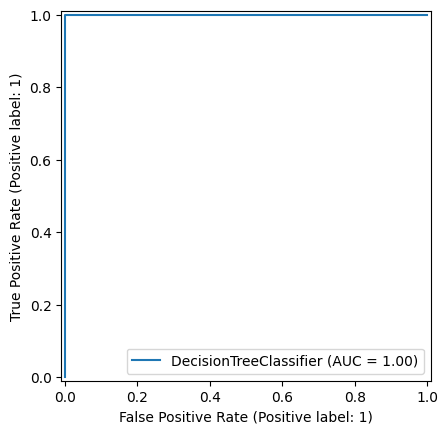

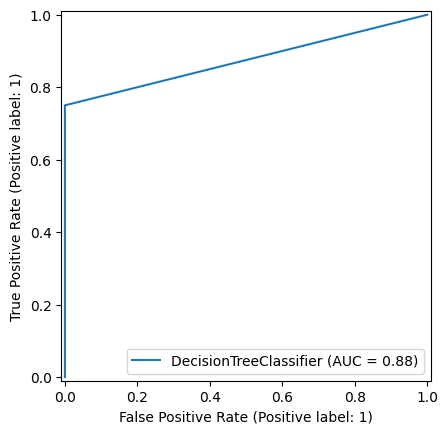

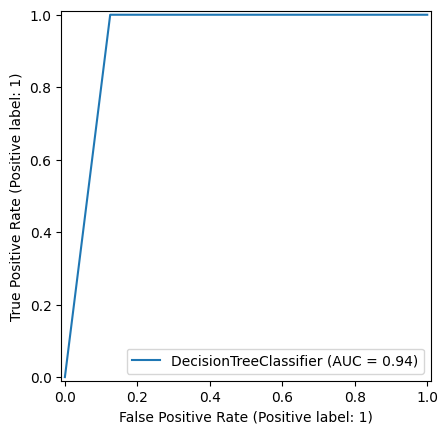

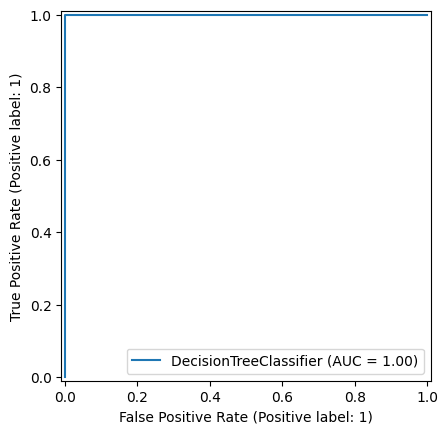

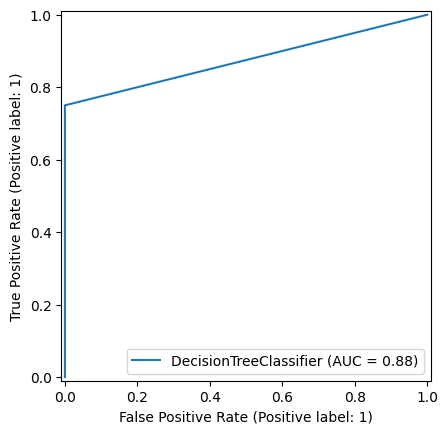

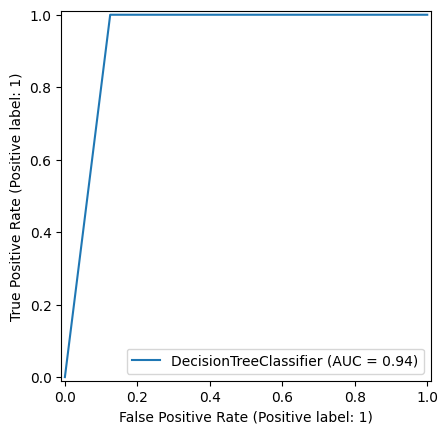

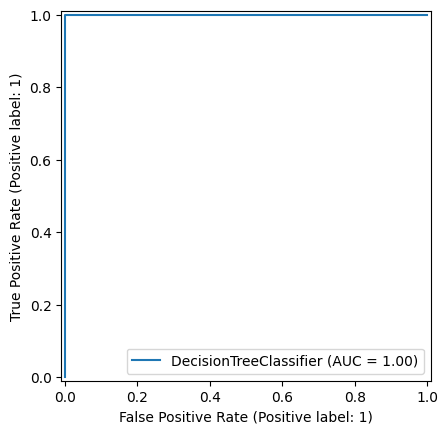

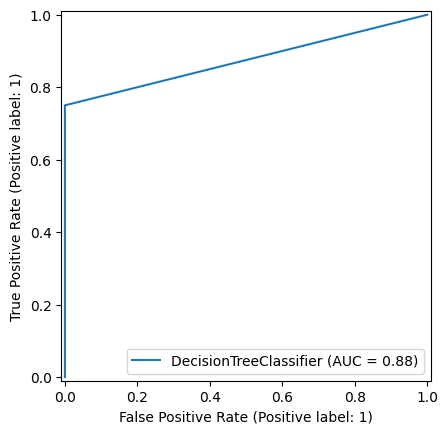

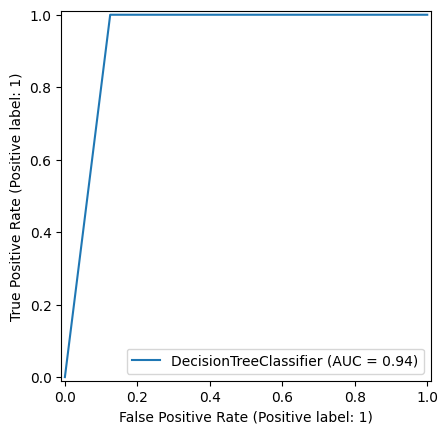

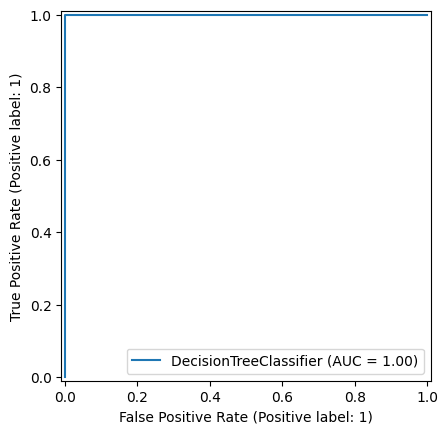

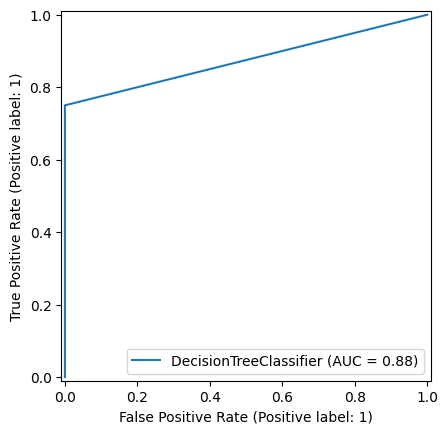

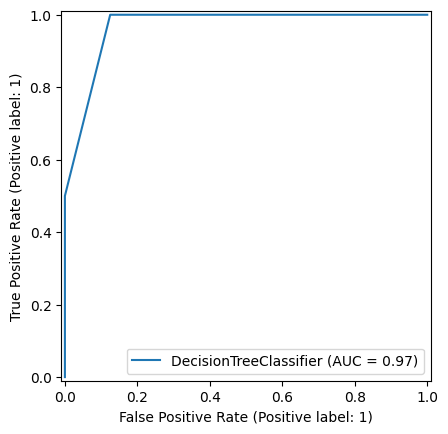

In [34]:
from sklearn.metrics import RocCurveDisplay


# Itera sui classificatori e sulle classi
for classifier in classifiers:
    for target_class in range(3):
        #print(target_class)
        # Crea etichette binarie per la classe target
        binary_y_train = []
        for y in iris_y_train:
            if y == target_class:
                binary_y_train.append(1)
            else:
                binary_y_train.append(0)

        binary_y_test = []
        for y in iris_y_test:
            if y == target_class:
                binary_y_test.append(1)
            else:
                binary_y_test.append(0)

        # Addestra il classificatore e traccia la curva ROC
        classifier.fit(iris_X_train, binary_y_train)
        RocCurveDisplay.from_estimator(classifier, iris_X_test, binary_y_test)
